# *TP1 Martingales*

*Professeur: Jules Flin*

*Étudiants: Gustavo Melo Scheidt Paulino & Jose Luis Rativa Medina*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Exercice 1. *La ruine du joueur et théorème d’arrêt*
On considère la suite de variables aléatoires $(X_n)_n$ définie par $X_0 = 0$ et $X_{n+1} = X_n + \xi_{n+1}$ où les $\xi_n$ sont i.i.d. de loi commune Rad.

On se donne deux entiers $a > 0$ et $b > 0$, et on s’intéresse à la variable aléatoire

$T = \inf \{ n, X_n \notin (-a, b) \}$
1. Écrire une fonction $partie()$ qui renvoie une trajectoire
de $(X_n)_{n \leq T}$ , et en tracer plusieurs.
2. Montrer que $(X_n)_n$ est une martingale par rapport la filtration $\mathcal{F}_n = \sigma(X_1, . . . , X_n)$.
3. En appliquant le théorème d’arrêt, calculer $\mathbb{P}(X_T = b)$.
4. Illustrer ce résultat par une méthode de Monte-Carlo.
5. Montrer que $Z_n := X^2 _n -n$ est une $\mathcal{F}_n$-martingale.
6. En déduire $\mathbb{E}[T]$.
7. B Illustrer ce résultat par une méthode de Monte-Carlo.


Données :

*   $X_0 = 0$
*   $X_{n+1} = X_n + \xi_{n+1}$
*   $(\xi_n)_n$ est une suite de variables aléatoires **i.i.d.** (indépendantes et identiquement distribuées) suivant une loi de Rademacher, c’est-à-dire :

$$
\mathbb{P}(\xi_n = +1) = \mathbb{P}(\xi_n = -1) = \frac{1}{2}
$$

$$\mathbb{E}[\xi_n] = \frac{1}{2} \cdot (-1) + \frac{1}{2} \cdot (1) = 0$$

---

La filtration associée est :

$$
\mathcal{F}_n = \sigma(X_1, \dots, X_n)
$$

ou bien, de façon équivalente :

$$
\mathcal{F}_n = \sigma(\xi_1, \dots, \xi_n)
$$

### 1. Écrire une fonction $partie()$ qui renvoie une trajectoire de $(X_n)_{n \leq T}$ , et en tracer plusieurs.

In [2]:
#Réponse 1
# definition de la fonction partie
def partie(a=5, b=5):
    x = 0
    trajet = [x]
    while x != -a and x != b:
        pas = np.random.choice([-1, 1])
        x += pas
        trajet.append(x)
    return trajet

In [3]:
a = int(input("Saisir la valeur de a: "))

Saisir la valeur de a:  5


In [4]:
b = int(input("Saisir la valeur de b: "))

Saisir la valeur de b:  5


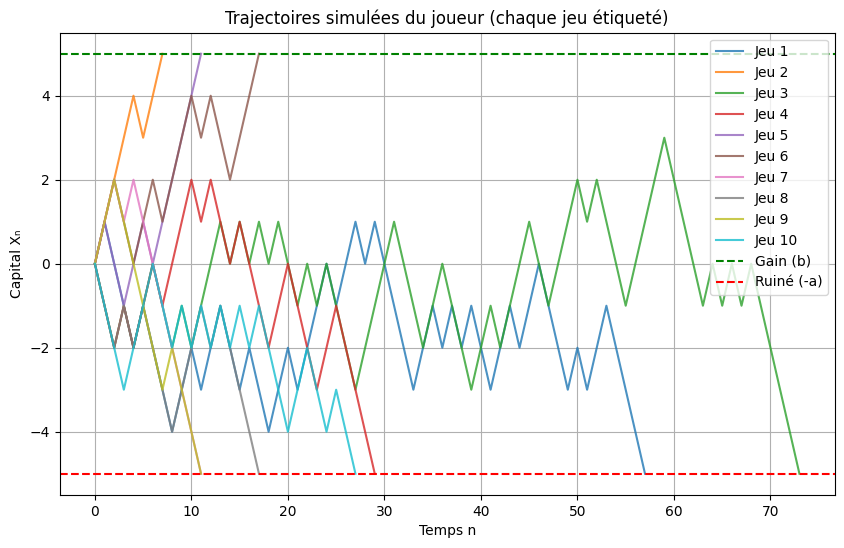

In [5]:
# Tracer plusieurs trajectoires
plt.figure(figsize=(10, 6))

for i in range(1, 11):  # 10 parties simulées (Jeu 1 à Jeu 10)
    traj = partie(a, b)
    plt.plot(range(len(traj)), traj, alpha=0.8, label=f"Jeu {i}")

plt.axhline(y=b, color='green', linestyle='--', label='Gain (b)')
plt.axhline(y=-a, color='red', linestyle='--', label='Ruiné (-a)')
plt.xlabel("Temps n")
plt.ylabel("Capital Xₙ")
plt.title("Trajectoires simulées du joueur (chaque jeu étiqueté)")
plt.grid(True)
plt.legend()
plt.show()

### 2. Montrer que $(X_n)_n$ est une martingale par rapport à la filtration $\mathcal{F}_n = \sigma(X_1, \dots, X_n)$

---

#### a. Adaptée à $\mathcal{F}_n$

$$
X_n = \sum_{i=1}^{n} \xi_i
$$

Comme $X_n$ est la somme des variables aléatoires $\xi_1, \dots, \xi_n$, on a que $X_n$ est $\mathcal{F}_n$-mesurable.

---

#### b. $X_n$ est intégrable

$$
\xi_n \in \{0, 1\} \Rightarrow |X_n| \leq n \Rightarrow \mathbb{E}[|X_n|] \leq \infty \Rightarrow X_n \text{ est intégrable}
$$

---

#### c. Vérification de la propriété de martingale

On veut montrer que :

$$
\mathbb{E}[X_{n+1} \mid \mathcal{F}_n] = X_n
$$

On a :

$$
X_{n+1} = X_n + \xi_{n+1}
$$

Donc :

$$
\begin{aligned}
\mathbb{E}[X_{n+1} \mid \mathcal{F}_n]
&= \mathbb{E}[X_n + \xi_{n+1} \mid \mathcal{F}_n] \\
&= \mathbb{E}[X_n \mid \mathcal{F}_n] + \mathbb{E}[\xi_{n+1} \mid \mathcal{F}_n] \\
&= X_n + \mathbb{E}[\xi_{n+1}] \\
&= X_n + 0 \\
&= X_n
\end{aligned}
$$

Par conséquent, $(X_n)$ est une martingale.



### 3. En appliquant le théorème d’arrêt, calculer $\mathbb{P}(X_T = b)$.

On applique le théorème d'arrêt :

$$\mathbb{E}[X_T \mid \mathcal{F}_0] = X_0$$

Donc :

$$\mathbb{E}[\mathbb{E}[X_T \mid \mathcal{F}_0]] = \mathbb{E}[X_0]$$

ce qui implique :

$$\mathbb{E}[X_T] = \mathbb{E}[X_0]$$

et comme $X_0 = 0$, on a :

$$\mathbb{E}[X_T] = 0$$

---

Supposons que $X_T$ atteigne $b$ ou $-a$ :

Alors :

- $X_T = b$ avec probabilité $p$
- $X_T = -a$ avec probabilité $1 - p$

Donc :

$$\mathbb{E}[X_T] = bp + (-a)(1 - p) = 0$$

Développons l'expression :

$$bp - a + ap = 0$$

Regroupons les termes :

$$p(a + b) = a$$

Donc :

$$p = \frac{a}{a + b}$$

Par conséquent :

$$\mathbb{P}(X_T = b) = \frac{a}{a + b}$$

In [6]:
# Monte Carlo: sumamos la indicatriz {X_T = b}
indicatrices = []
N = 5000
for _ in range(N):
    x_T = partie()[-1]
    indicatrices.append(1 if x_T == b else 0)

# Estimación de la probabilidad
proba_est = np.mean(indicatrices)
proba_theorique = a / (a + b)

# Mostrar resultados
print(f"Probabilité estimée de P(X_T = b) : {proba_est:.4f}")
print(f"Probabilité théorique             : {proba_theorique:.4f}")

Probabilité estimée de P(X_T = b) : 0.4942
Probabilité théorique             : 0.5000


### 5. Montrer que $Z_n := X^2 _n -n$ est une $\mathcal{F}_n$-martingale.

---
On a :

$$
\mathcal{F}_n = \sigma(\xi_1, \dots, \xi_n) \quad \text{et} \quad X_n = \sum_{i=1}^{n} \xi_i
$$

Alors $X_n \in \mathcal{F}_n \Rightarrow X_n^2 \in \mathcal{F}_n \Rightarrow Z_n \in \mathcal{F}_n$.

---
On considère :

$$
Z_n = X_n^2 - n \quad \Rightarrow \quad Z_{n+1} = X_{n+1}^2 - (n+1)
$$

Vérifions la propriété de martingale :

$$
\begin{aligned}
\mathbb{E}[Z_{n+1} \mid \mathcal{F}_n]
&= \mathbb{E}[(X_{n+1})^2 - (n + 1) \mid \mathcal{F}_n] \\
&= \mathbb{E}[(X_n + \xi_{n+1})^2 - (n + 1) \mid \mathcal{F}_n] \\
&= \mathbb{E}[X_n^2 + 2X_n \xi_{n+1} + \xi_{n+1}^2 - n - 1 \mid \mathcal{F}_n] \\
&= X_n^2 + 2X_n \underbrace{\mathbb{E}[\xi_{n+1} \mid \mathcal{F}_n]}_{=0} + \underbrace{\mathbb{E}[\xi_{n+1}^2 \mid \mathcal{F}_n]}_{=\mathbb{E}[\xi_{n+1}^2] = 1^2 \cdot \frac{1}{2} + (-1)^2 \cdot \frac{1}{2} = \frac{1}{2} + \frac{1}{2} = 1} - (n + 1) \\
&= X_n^2 + 1 - (n + 1) = X_n^2 - n = Z_n
\end{aligned}
$$

Donc $(Z_n)$ est bien une **martingale**.

### 6. En déduire $\mathbb{E}[T]$

On applique le théorème d'arrêt :

$\mathbb{E}[Z_T | \mathcal{F}_n] = Z_0$

$$\mathbb{E}[\mathbb{E}[Z_T | \mathcal{F}_n]] = \mathbb{E}[Z_0]$$

$$\mathbb{E}[Z_T] = \mathbb{E}[Z_0]$$

$$Z_0 = X_0^2 - 0 = 0$$

$$\Rightarrow \mathbb{E}[Z_T] = \mathbb{E}[Z_0] = \mathbb{E}[0] = 0 $$

On s'interesse par :
$$Z_T = X_T^2 - T$$

$$\mathbb{E}[Z_T] = \mathbb{E}[X_T^2 - T] = 0$$

$$\mathbb{E}[T] = \mathbb{E}[X_T^2]$$

On sait que $X_T \in \{ -a, b \}$, donc :

$$
X_T^2 =
\begin{cases}
a^2 & \text{avec probabilité } \mathbb{P}(X_T = -a) = \dfrac{b}{a + b} \\
b^2 & \text{avec probabilité } \mathbb{P}(X_T = b) = \dfrac{a}{a + b}
\end{cases}
$$

Ainsi :

$$
\mathbb{E}[X_T^2] = a^2 \cdot \frac{b}{a + b} + b^2 \cdot \frac{a}{a + b}
= \frac{a^2 b + a b^2}{a + b} = \frac{ab(a + b)}{a + b} = ab
$$

Comme :

$$
Z_T = X_T^2 - T \quad \text{et} \quad \mathbb{E}[Z_T] = 0
$$

on obtient :

$$
\mathbb{E}[T] = \mathbb{E}[X_T^2] = ab
$$


In [7]:
temps = []
for _ in range(N):
    traj = partie()
    T = len(traj) - 1
    temps.append(T)

# Result
E_T_estimado = np.mean(temps)
E_T_teorico = a * b

print(f"Estimation Monte Carlo de E[T]     : {E_T_estimado:.2f}")
print(f"Valeur théorique de E[T] = a × b      : {E_T_teorico:.2f}")

Estimation Monte Carlo de E[T]     : 25.42
Valeur théorique de E[T] = a × b      : 25.00


### Exercice 2. *L’urne de Pólya et convergence de martingales*
On s’intéresse à une urne contenant des boules rouges et bleues. On suppose qu’initialement l’urne contient $A$ boules rouges et $B$ boules
bleues. A chaque étape, on tire uniformément au hasard une boule, et on la remet dans l’urne avec
une boule de même couleur.

On s’intéresse à la fraction de boules rouges au cours du temps.

---

1. On note $X_k$ la proportion de boules rouges à la $k-ième$ étape. Montrer que $(X_k)_k$ est une martingale, et qu’elle converge presque sûrement.
2. Écrire une fonction $polya(A,B,n)$ qui renvoie une réalisation de la suite $(X_k)_{k \leq n}$ quand l’urne est initialisée avec A
boules rouges et B boules bleues.
3. Illustrer la convergence presque sûre en traçant plusieurs trajectoires de *X* en faisant varier les paramètres.
4. On peut montrer que $(Xn)$ converge en loi vers une variable aléatoire $X \backsim \beta(A, B)$. Simuler
un K-échantillon de $Xn$ pour $K = 100$ et $n = 1000$, et superposer un histogramme de cet
échantillon avec la densité d’une loi beta de paramètres $A$ et $B$.
5. On s’intéresse au cas particulier $A = B = 1$, et à la loi limite. Simuler un K-échantillon dans
ce cas là, et proposer une expression plus simple de la loi $\beta (1, 1)$.
6. Prouver le résultat conjecturé à la question précédente.

Réponse 1:

1. $R_k$ : nombre de boules rouges au temps $k$  
$N_k = A + B + k$ : nombre total de boules après $k$ tirages  
$X_k = \frac{R_k}{N_k}$ : proportion de boules rouges  

$$\mathbb{P}(\text{rouge}) = \frac{R_k}{N_k} = X_k$$  

Si on tire une rouge $\Rightarrow R_{k+1} = R_k + 1$  
Si on tire une bleue $\Rightarrow R_{k+1} = R_k$  

Donc:  
$$\mathbb{E}[R_{k+1} | \mathcal{F}_k] = R_k + \mathbb{P}(\text{rouge}) = R_k + \frac{R_k}{N_k} = R_k + X_k$$

Et comme $N_{k+1} = N_k + 1$:

$\mathbb{E}[X_{k+1} | \mathcal{F}_k] = \frac{\mathbb{E}[R_{k+1} | \mathcal{F}_k]}{N_{k+1}} = \frac{R_k + X_k}{N_k + 1} = \frac{R_k}{N_k + 1} + \frac{X_k}{N_k + 1}$

Mais:  

$\frac{R_k}{N_k + 1} = X_k \cdot \frac{N_k}{N_k + 1}, \quad \text{et} \quad \frac{X_k}{N_k + 1} = X_k \cdot \frac{1}{N_k + 1}$

Donc, en sommant:  

$X_k \cdot \left( \frac{N_k}{N_k + 1} + \frac{1}{N_k + 1} \right) = \frac{X_k \cdot (N_k + 1)}{N_k + 1} = X_k$

Donc c’est une $\mathcal{MG}$.

$\textbf{Convergence:}$

Comme $X_k \in [0, 1]$, $(X_k)$ est une $\mathcal{MG}$ bornée.  
Le théorème de convergence pour martingales bornées dans $L^1$ s’applique :  

$X_k \xrightarrow{\text{p.s.}} X_\infty \in [0,1]$


In [8]:
#Réponse 2
import numpy as np

def polya(A, B, n):
    rouge = A
    bleue = B
    total = rouge + bleue
    X = [rouge / total]  # proportion initiale

    for _ in range(n - 1):
        # on tire une boule au hasard (true si rouge, false si bleue)
        draw = np.random.rand() < (rouge / (rouge + bleue)) # ici on tire avec probabilité proportionnelle
        if draw:
            rouge += 1
        else:
            bleue += 1
        X.append(rouge / (rouge + bleue)) # on calcule la nouvelle proportion de rouges

    return X

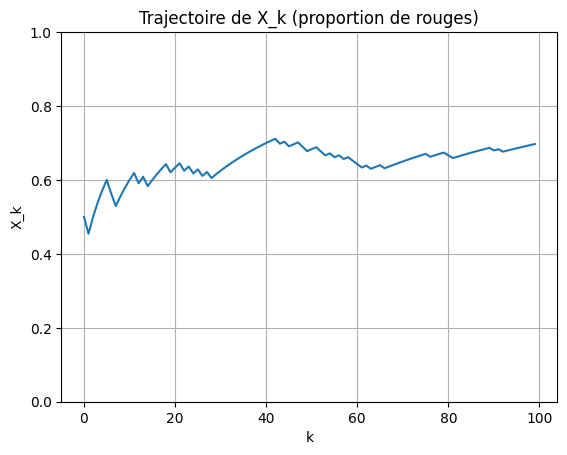

In [9]:
#exemple de comment utiliser polya:
import matplotlib.pyplot as plt

n = 100
traj = polya(A=5, B=5, n=n)
plt.plot(traj)
plt.title("Trajectoire de X_k (proportion de rouges)")
plt.xlabel("k")
plt.ylabel("X_k")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

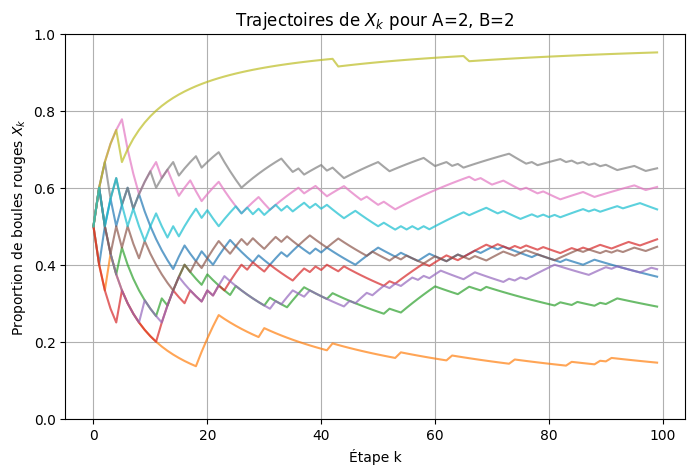

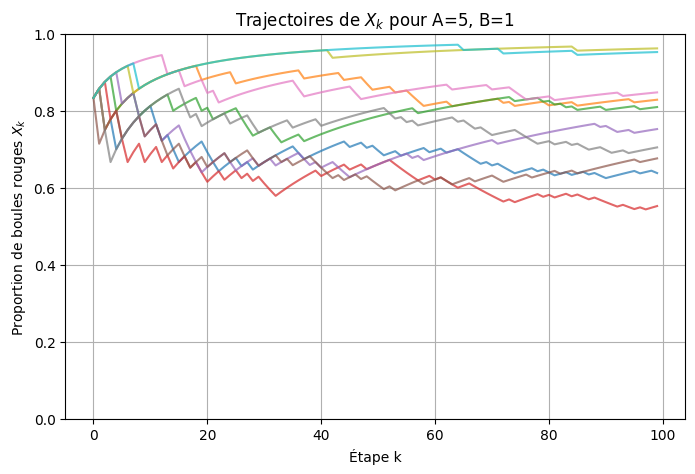

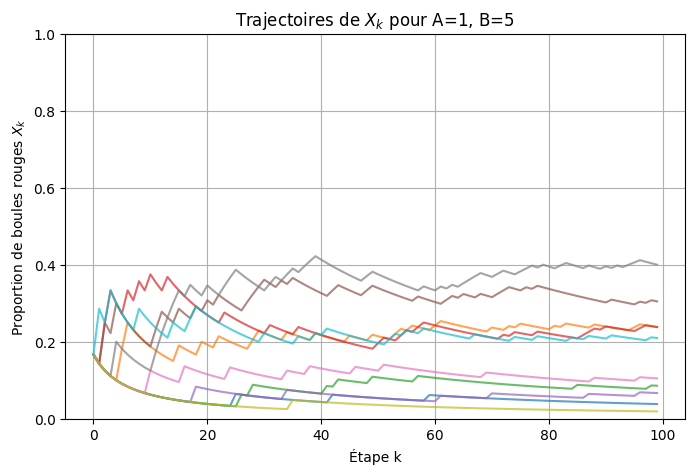

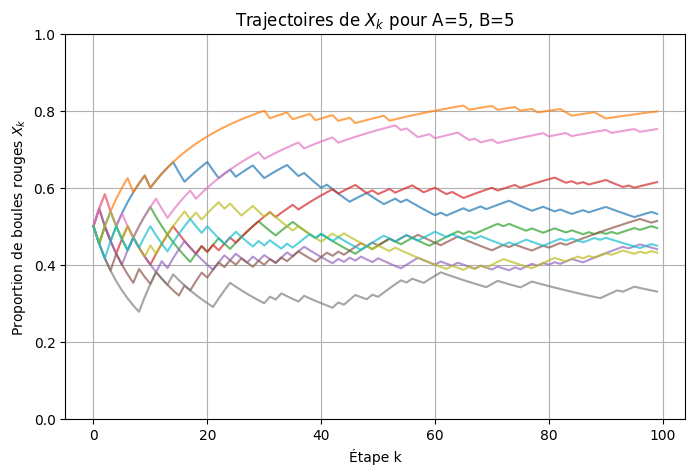

In [10]:
#Réponse 3
#on n'avait pas vu le item 3 avant d'écrire le matplotlib code au-dessus (de la réponse 1), mais on a decidé de laisser pour montrer des manières diferentes
import matplotlib.pyplot as plt

def tracer_trajectoires(n, repetitions, A, B):
    plt.figure(figsize=(8, 5))
    for _ in range(repetitions):
        X = polya(A, B, n)
        plt.plot(X, alpha=0.7)

    plt.title(f"Trajectoires de $X_k$ pour A={A}, B={B}")
    plt.xlabel("Étape k")
    plt.ylabel("Proportion de boules rouges $X_k$")
    plt.ylim(0, 1)
    plt.grid(True)
    plt.show()

# liste des paires (A, B) à tester
parametres = [(2, 2), (5, 1), (1, 5), (5,5)]

# pour chaque paire, on trace les trajectoires
for A, B in parametres:
    tracer_trajectoires(n=100, repetitions=10, A=A, B=B)


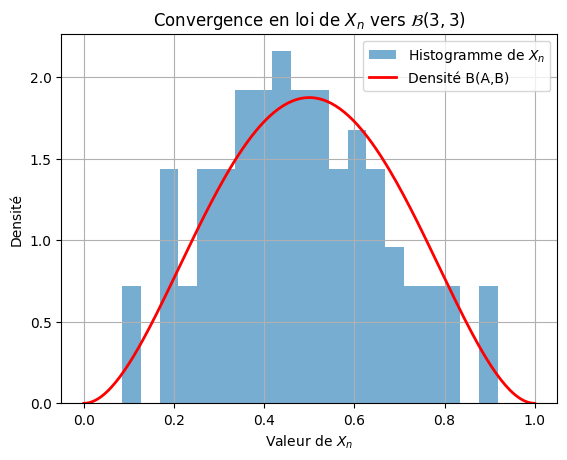

In [11]:
#Réponse 4
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta #on a utilisé ce librarie pour la loi beta (on a cherché en ligne pour une librarie que contennait une loi beta)
                             #https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html

A = 3
B = 3
K = 100    # comme avant, on veut simuler 100 trajectoires
n = 1000   # chaque trajectoire a 1000 étapes

# ici on simule les trajectoires et on garde juste la dernière valeur (X_n)
echantillon = []
for _ in range(K):
    X = polya(A, B, n)        # on génère une trajectoire du processus de Pólya
    dernier = X[-1]           # on récupère la dernière valeur
    echantillon.append(dernier)  # on l'ajoute à la liste

# on trace un histogramme des valeurs finales simulées
plt.hist(echantillon, bins=20, density=True, alpha=0.6, label='Histogramme de $X_n$')

# on trace aussi la densité théorique de la loi Beta pour comparer
x = np.linspace(0, 1, 200)
plt.plot(x, beta.pdf(x, A, B), 'r-', lw=2, label='Densité B(A,B)')

# graphique
plt.title(f"Convergence en loi de $X_n$ vers $\\mathcal{{B}}({A},{B})$")
plt.xlabel("Valeur de $X_n$")
plt.ylabel("Densité")
plt.legend()
plt.grid(True)
plt.show()


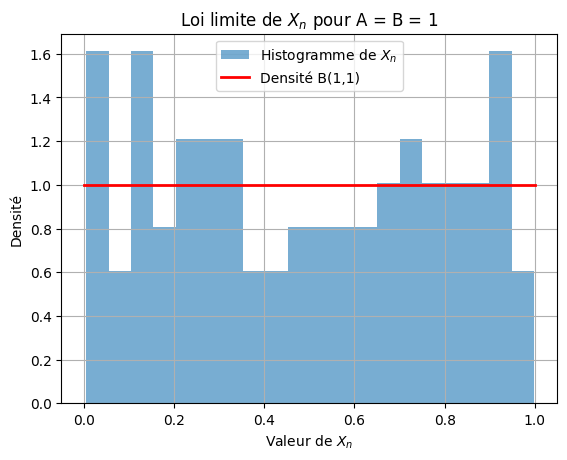

In [12]:
#Réponse 5
A = 1
B = 1
K = 100
n = 1000

echantillon = []
for _ in range(K):
    X = polya(A, B, n)
    dernier = X[-1]
    echantillon.append(dernier)

plt.hist(echantillon, bins=20, density=True, alpha=0.6, label='Histogramme de $X_n$')

# densité théorique de la loi Beta(1,1)
x = np.linspace(0, 1, 200)
plt.plot(x, beta.pdf(x, A, B), 'r-', lw=2, label='Densité B(1,1)')

plt.title("Loi limite de $X_n$ pour A = B = 1")
plt.xlabel("Valeur de $X_n$")
plt.ylabel("Densité")
plt.legend()
plt.grid(True)
plt.show()


**Réponse 6**

On sait que la densité de la loi bêta $\beta(A, B)$ est donnée par :

$$
f(x) = \frac{1}{\mathrm{B}(A,B)} x^{A - 1} (1 - x)^{B - 1}, \quad \text{pour } x \in [0,1]
$$

où $\mathrm{B}(A, B)$ désigne la fonction Beta (fonction de normalisation).

Pour $A = B = 1$, on obtient :

$$
f(x) = \frac{1}{\mathrm{B}(1,1)} x^{0} (1 - x)^{0} = \frac{1}{\mathrm{B}(1,1)} = 1, \quad \text{pour } x \in [0,1]
$$

Cela correspond exactement à la densité de la loi uniforme sur $[0,1]$.

**Donc on a bien montré que** $\beta(1,1) = \mathcal{U}[0,1]$.


### Exercice 3. *Application des martingales dans l’étude de l’arbre de Galton-Watson surcritique*

Dans ce dernier exercice, on s’intéresse à un modèle issu de la biologie : l’arbre de Galton-Watson. On en donne ici une définition naïve.

Soit $(\xi_{i,j})_{(i,j)}$ un ensemble de variables aléatoires i.i.d. à valeurs dans $\mathbb{N}$ et intégrables d’espérance $\mu$. Considérons la suite $(Z_n)_n$ définie par récurrence par $Z_0 = 1$ et

$Z_{n+1} = \sum_{i=1}^{Z_n} \xi_{n+1,i}$

avec la convention $\sum_{\emptyset} = 0$. On peut interpréter $Z_n$ comme la taille d’une population à la génération $n : \xi_{n+1,i}$ est alors le nombre de descendants du $i$ individu de la génération $n$.

---

1. Rédiger un court programme qui simule une trajectoire de $(Z_n)_n$. Tester ce programme avec plusieurs lois/paramètres et conjecturer le comportement limite de $(Z_n)_n$ quand $\mu < 1$  et $\mu > 1$.

3. On suppose que μ > 1. Montrer que $(Z_n / \mu^n)_n$ est une martingale.

4. En déduire $\mathbb{E}[Z_n]$ et l’illustrer par des méthodes de Monte-Carlo.

5. On suppose que $Var(\xi_{0,0}) = \sigma^2 < ∞$. Montrer que $(Z_n / \mu^n)_n$ converge p.s. et dans $L^2$ vers une variable aléatoire $Y_\infty$.

6. Tracer la distribution empirique (approchée) de $Y_\infty$, conditionnellement à $Y_\infty \neq 0$.


La valeur de mu doit être >= 1 pour la distribution géométrique. mu=0.8


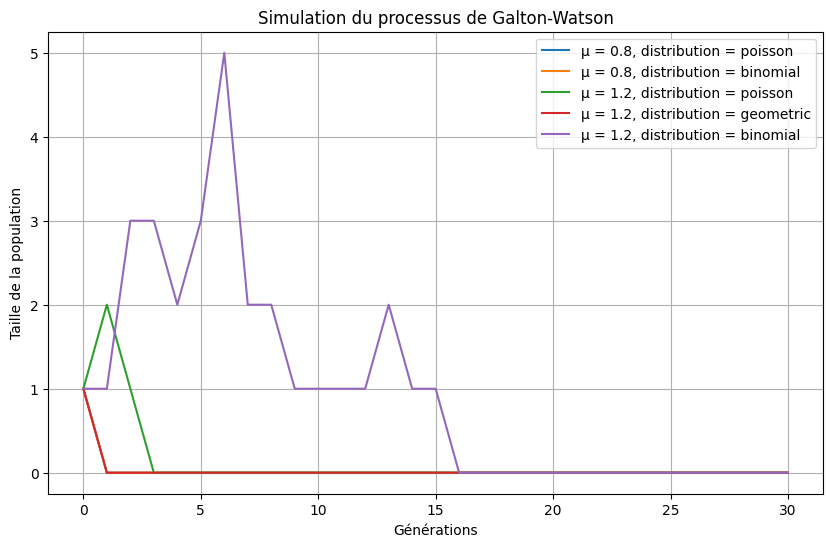

In [13]:
#Réponse 1
import numpy as np
import matplotlib.pyplot as plt

def simuler_galton_watson(mu, distribution="poisson", generations=20, seed=None):
    if seed is not None:
        np.random.seed(seed)

    Z = [1]  # Z_0 = 1
    for n in range(generations):
        Zn = Z[-1]
        if Zn == 0:
            Z.append(0)
            continue

        # Générer les enfants pour chaque individu de la génération actuelle
        if distribution == "poisson":
            enfants = np.random.poisson(mu, Zn)
        elif distribution == "binomial":
            # mu = n * p, par exemple n=5, donc p = mu/5
            enfants = np.random.binomial(n=5, p=mu/5, size=Zn)
        elif distribution == "geometric":
            if mu < 1:
                print("La valeur de mu doit être >= 1 pour la distribution géométrique.")
                Z.append(0)
                break
            p = 1 / mu
            enfants = np.random.geometric(p=p, size=Zn) - 1
        else:
            raise ValueError("Distribution non prise en charge.")

        Z.append(np.sum(enfants))

    return Z

# Exemple : mu < 1 et mu > 1
mus = [0.8, 1.2]
distributions = ["poisson", "geometric", "binomial"]

plt.figure(figsize=(10, 6))

for mu in mus:
    for dist in distributions:
        if dist == "geometric" and mu < 1:
            print(f"La valeur de mu doit être >= 1 pour la distribution géométrique. mu={mu}")
            continue
        Z = simuler_galton_watson(mu=mu, distribution=dist, generations=30, seed=42)
        plt.plot(Z, label=f"μ = {mu}, distribution = {dist}")

plt.title("Simulation du processus de Galton-Watson")
plt.xlabel("Générations")
plt.ylabel("Taille de la population")
plt.legend()
plt.grid(True)
plt.show()



### Conjecture sur le comportement limite du processus de Galton-Watson

À partir des simulations réalisées pour différentes lois de reproduction (Poisson, Binomiale, Géométrique) et différents paramètres $\mu$, on voit que :

- Lorsque $\mu < 1$ (cas sous-critique), le processus **s’éteint presque sûrement**, c’est-à-dire que la population finit toujours par disparaître après un certain nombre de générations.
- Lorsque $\mu > 1$ (cas surcritique), il existe une **probabilité strictement positive** que la population survive indéfiniment, avec une croissance potentiellement exponentielle du nombre d’individus.



### 2. On suppose que μ > 1. Montrer que $(Z_n / \mu^n)_n$ est une martingale.
$$
\mathbb{E}[\xi_{i,j}] = \mu
$$

$$
X_n := \frac{Z_n}{\mu^n} \quad \text{(Processus de martingale)}
$$

---

**1. Adaptation à la filtration $\mathcal{F}_n $**

$$
Z_n = \sum_{i=1}^{Z_{n-1}} \xi_{n,i}
$$

Chaque $ \xi_{n,i} $ est mesurable par rapport à $\mathcal{F}_n $, donc $Z_n$ est $ \mathcal{F}_n $-mesurable.

Par conséquent, $ X_n = \frac{Z_n}{\mu^n} $ est aussi $ \mathcal{F}_n $-mesurable.

---

**2. Intégrabilité**

On a $ \mathbb{E}[\xi_{n,i}] = \mu < \infty$

$$
\mathbb{E}[|X_n|] = \mathbb{E}\left[\left|\frac{Z_n}{\mu^n}\right|\right] = \frac{\mathbb{E}[Z_n]}{\mu^n} = \frac{\sum_{i=1}^{Z_{n-1}} \mathbb{E}[\xi_{n,i}]}{\mu^n} = \frac{Z_{n-1}\cdot \mu}{\mu^n} < \infty
$$

Ainsi, $ X_n $ est intégrable.

---

**3. Propriété de martingale**

$$
\mathbb{E}[\xi_{i,j}] = \mu
$$

$$
X_n := \frac{Z_n}{\mu^n} \quad \text{(Processus de martingale)}
$$

$$
X_{n+1} = \frac{Z_{n+1}}{\mu^{n+1}} = \frac{1}{\mu^{n+1}} \sum_{i=1}^{Z_n} \xi_{n+1,j}
$$

$$
\mathbb{E}[X_{n+1} \mid \mathcal{F}_n] = \frac{1}{\mu^{n+1}} \sum_{i=1}^{Z_n} \mathbb{E}[\xi_{n+1,j}] =  \frac{1}{\mu^{n+1}} \sum_{i=1}^{Z_n} \mu = \frac{Z_n \cdot \mu}{\mu^{n+1}} = \frac{Z_n}{\mu^n} = X_n
$$

$$
\text{Donc, } (X_n) \text{ est une martingale par rapport à } (\mathcal{F}_n)
$$


### 3. En déduire  E[Zn]  et l’illustrer par des méthodes de Monte-Carlo.

Soit $(Z_n)_{n \geq 0}$ le processus de Galton-Watson défini par :

- $Z_0 = 1$
- $Z_{n+1} = \sum_{i=1}^{Z_n} \xi_{n+1,i}$

où les $\xi_{n+1,i}$ sont des variables aléatoires i.i.d. à valeurs dans $\mathbb{N}$, intégrables, et telles que :

$$
\mathbb{E}[\xi_{n+1,i}] = \mu > 0
$$


### cas de base

On sait que $Z_0 = 1$, donc :

$$
\mathbb{E}[Z_0] = 1 = \mu^0
$$


Supposons que :

$$\mathbb{E}[Z_n] = \mu^n$$

On veut montrer que :
$$
\mathbb{E}[Z_{n+1}] = \mu^{n+1}
$$

Or on a :

$$
Z_{n+1} = \sum_{i=1}^{Z_n} \xi_{n+1,i}
$$

et comme les $\xi_{n+1,i}$ sont i.i.d. et indépendantes de $\mathcal{F}_n$ :

$$
\mathbb{E}[Z_{n+1} \mid \mathcal{F}_n] = \sum_{i=1}^{Z_n} \mathbb{E}[\xi_{n+1,i}] = \mu Z_n$$

En prenant l'espérance :

$$
\mathbb{E}[Z_{n+1}] = \mathbb{E}[\mu Z_n] = \mu \cdot \mathbb{E}[Z_n] = \mu \cdot \mu^n = \mu^{n+1}
$$

Estimation de E[Z_10] par Monte Carlo : 1027.22
Valeur théorique de E[Z_10]           : 1024.00


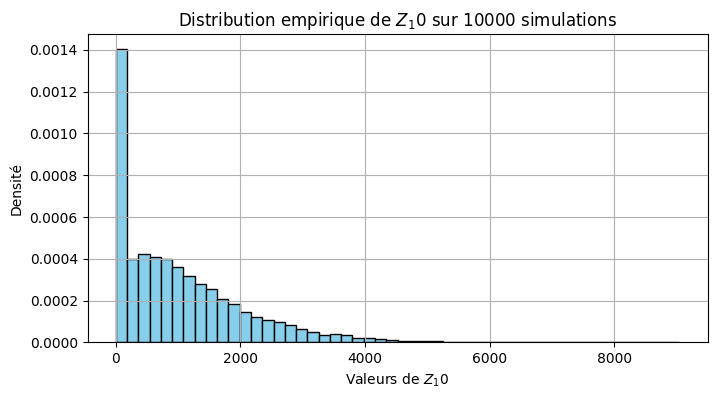

In [14]:
mu = 2
n = 10
N = 10000

def galton_watson(n):
    Z = [1]  # Z0 = 1
    for k in range(n):
        enfants = np.sum(np.random.poisson(mu, size=Z[-1]))
        Z.append(enfants)
    return Z

# Simulation Monte Carlo
Z_n_valeurs = []
for _ in range(N):
    Zn = galton_watson(n)[-1]
    Z_n_valeurs.append(Zn)

esperance_estimee = np.mean(Z_n_valeurs)
esperance_theorique = mu ** n
print(f"Estimation de E[Z_{n}] par Monte Carlo : {esperance_estimee:.2f}")
print(f"Valeur théorique de E[Z_{n}]           : {esperance_theorique:.2f}")

plt.figure(figsize=(8, 4))
plt.hist(Z_n_valeurs, bins=50, color="skyblue", edgecolor="k", density=True)
plt.title(f"Distribution empirique de $Z_{n}$ sur {N} simulations")
plt.xlabel(f"Valeurs de $Z_{n}$")
plt.ylabel("Densité")
plt.grid(True)
plt.show()


**Réponse 4**

Pour démontrer la convergence de $X_n = \frac{Z_n}{\mu^n}$, on suppose que $\mathrm{Var}(\xi_{0,0}) = \sigma^2 < +\infty$.

On calcule :
$$
\mathbb{E}[X_n^2] = \mathbb{E}\left[\left( \frac{Z_n}{\mu^n} \right)^2 \right] = \frac{\mathbb{E}[Z_n^2]}{\mu^{2n}}
$$

Si l'on sait (par des résultats classiques sur les processus de Galton-Watson) que $\mathbb{E}[Z_n^2] \leq C_1 \cdot \mu^{2n}$ pour une constante $C_1 > 0$, alors :
$$
\mathbb{E}[X_n^2] \leq C_1
\Rightarrow \sup_n \mathbb{E}[X_n^2] < +\infty
$$

Cela signifie que la martingale $(X_n)$ est **uniformément bornée dans $L^2$**.

Le **théorème de Doob** assure que si une martingale $(X_n)$ est bornée dans $L^2$, alors :

- Elle **converge presque sûrement**
- Et **converge dans $L^2$** vers une variable aléatoire $Y_\infty$


Sous l’hypothèse $\mathrm{Var}(\xi_{0,0}) < +\infty$, on a :

$$
X_n = \frac{Z_n}{\mu^n} \xrightarrow[n \to \infty]{\text{p.s. et } L^2} Y_\infty
$$

Autrement dit, la population normalisée converge de façon forte vers une limite aléatoire stable.

---

**Réponse 5**

Dans l'item 4, on a vu que:
$$
X_n = \frac{Z_n}{\mu^n} \xrightarrow[n \to \infty]{\text{p.s. et } L^2} Y_\infty
$$

- Maintenant, on veut simuler plusieurs $X_n$ avec grands $n$ (ex: $n=100$)
- Et observer la distribuition de $X_n$ seulement dans les cas où $X_n \neq 0$ (autrement dit, quand il n'y a pas d'extinction)

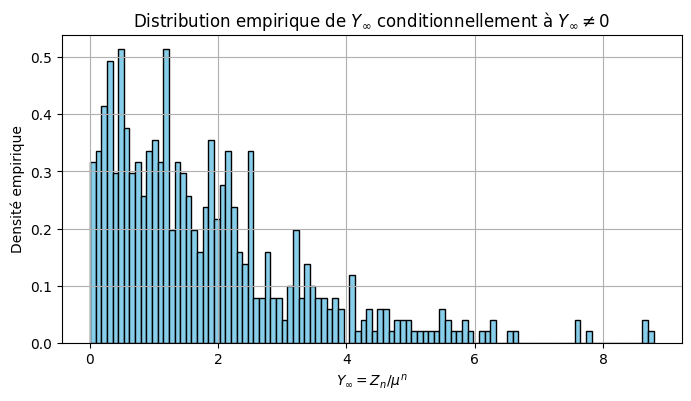

Taux estimé d'extinction : 0.4240


In [15]:
mu = 1.5
sigma2 = 1.0
n = 15
N = 1000

# Simulation d'une trajectoire jusqu'à la génération n
def galton_watson(n):
    Z = 1
    for _ in range(n):
        enfants = sum(np.random.poisson(mu) for _ in range(Z))
        Z = enfants
        if Z == 0:
            break
    return Z

# Monte Carlo
Yn_vals = []
for _ in range(N):
    Zn = galton_watson(n)
    if Zn > 0:
        Yn = Zn / mu**n
        Yn_vals.append(Yn)

plt.figure(figsize=(8, 4))
plt.hist(Yn_vals, bins=100, density=True, color='skyblue', edgecolor='k')
plt.title("Distribution empirique de $Y_\\infty$ conditionnellement à $Y_\\infty \\neq 0$")
plt.xlabel("$Y_\\infty = Z_n / \\mu^n$")
plt.ylabel("Densité empirique")
plt.grid(True)
plt.show()

# Affichage du taux d'extinction
taux_extinction = 1 - len(Yn_vals) / N
print(f"Taux estimé d'extinction : {taux_extinction:.4f}")

